In [1]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/krishnapatel/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [2]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import pickle
import nltk.classify.util
import sys
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def clean(words):
    return dict([(word, True) for word in words])


negative_ids = movie_reviews.fileids('neg')
positive_ids = movie_reviews.fileids('pos')


negative_features = [(clean(movie_reviews.words(fileids=[f])), 'negative') for f in negative_ids]
positive_features = [(clean(movie_reviews.words(fileids=[f])), 'positive') for f in positive_ids]


negative_cutoff = int(len(negative_features) * 95/100)
positive_cutoff = int(len(positive_features) * 90/100)

train_features = negative_features[:negative_cutoff] + positive_features[:positive_cutoff]
test_features = negative_features[negative_cutoff:] + positive_features[positive_cutoff:]

print('Training on %d data, testing on %d data' % (len(train_features), len(test_features)))
classifier = NaiveBayesClassifier.train(train_features)
print('Training complete')
print('accuracy:', nltk.classify.util.accuracy(classifier, test_features)*100,'%')
classifier.show_most_informative_features()


f = open('model', 'wb')
pickle.dump(classifier, f)
f.close()

Training on 1850 data, testing on 150 data
Training complete
accuracy: 81.33333333333333 %
Most Informative Features
             outstanding = True           positi : negati =     16.4 : 1.0
               ludicrous = True           negati : positi =     13.5 : 1.0
              astounding = True           positi : negati =     13.0 : 1.0
                  avoids = True           positi : negati =     13.0 : 1.0
                 idiotic = True           negati : positi =     12.3 : 1.0
             fascination = True           positi : negati =     11.6 : 1.0
               atrocious = True           negati : positi =     11.1 : 1.0
                  symbol = True           positi : negati =     10.9 : 1.0
                  annual = True           positi : negati =     10.2 : 1.0
                  hudson = True           negati : positi =      9.8 : 1.0


In [3]:
f = open('model', 'rb')
classifier = pickle.load(f)
f.close()



sentence="i don't love you "
features = clean(sentence)
print(classifier.classify(features))

sentence="i love you sweetheart "
features = clean(sentence)
print(classifier.classify(features))


sentence="i am not saying that i don't love you"
features = clean(sentence)
print(classifier.classify(features))

sentence="This size of laptop is very bad"
features = clean(sentence)
print(classifier.classify(features))



negative
positive
positive
negative


In [4]:
opinion={}

f=open('_chat.txt','r')
pos,neg=0,0
for line in f:
    try:
        chat=line.split(']')[1].split(':')[1]
        name=line.split(']')[1].split(':')[0]
        if opinion.get(name,None) is None:
            opinion[name]=[0,0]
        res=classifier.classify(clean(chat))
        print(name,res,chat)
        if res=='positive':
            pos+=1
            opinion[name][0]+=1
        else:
            neg+=1
            opinion[name][1]+=1
    except:
        pass
print("positive: {} \nNegative: {}".format(pos,neg))

 Krishna Patel positive  I have created this group

 Krishna Patel negative  So frm now onwards we 3 will chat on this

 Krishna Patel positive  N share photos on this

 Adit positive  Lol het is too "cool" to message

 Adit positive  Loool wow that's an old picture

 Krishna Patel negative  ‎image omitted

 Het positive  🐵 in the middle

 Krishna Patel negative  😁😁😁

 Krishna Patel negative  U both still fight ?

 Het negative  No

 Krishna Patel positive  Nop no one is annoying 😂😂

 Het positive  U have no idea😂

 Krishna Patel negative  No bt I have to take side of both of u

 Het positive  Lol that's true

 Krishna Patel negative  😂😂😂

 Het positive  Yea I'm done school

 Het positive  Now just relaxing in vacation

 Het negative  Wbu

 Krishna Patel negative  Cool

 Krishna Patel negative  My 3year is started from this week

 Het positive  Oh yea

 Het negative  Ur vacation starts earlier

 Krishna Patel negative  Ya bt it’s nothing like vacation

 Het positive  Lol why

 Krishna 

<IPython.core.display.Javascript object>


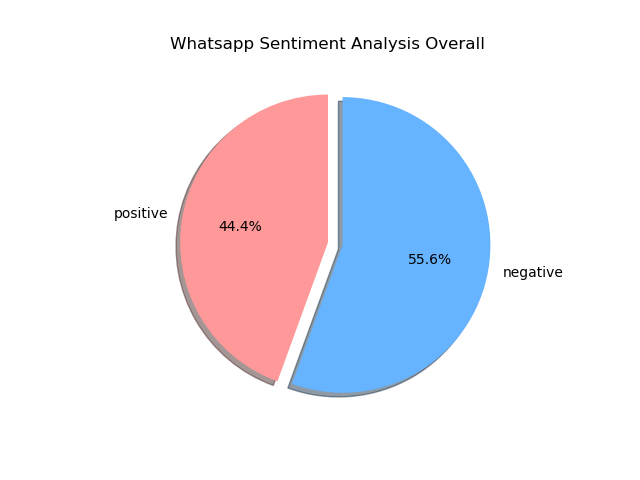

Text(0.5, 1.0, 'Whatsapp Sentiment Analysis Overall')

In [5]:
neg = abs(neg)
sizes = [15, 30]
labels = ['positive', 'negative']
explodes = (0, 0.1)
colors = ['#ff9999','#66b3ff']
sizes = [pos, neg]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explodes, autopct='%1.1f%%',  colors=colors, shadow=True, startangle=90)
plt.title('Whatsapp Sentiment Analysis Overall')


In [6]:
names,positive,negative=[],[],[]
for name in opinion:
    names.append(name)
    positive.append(opinion[name][0])
    negative.append(opinion[name][1])
    

In [7]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 0.5*h, '%d'%int(h),
                ha='center', va='bottom')


<IPython.core.display.Javascript object>


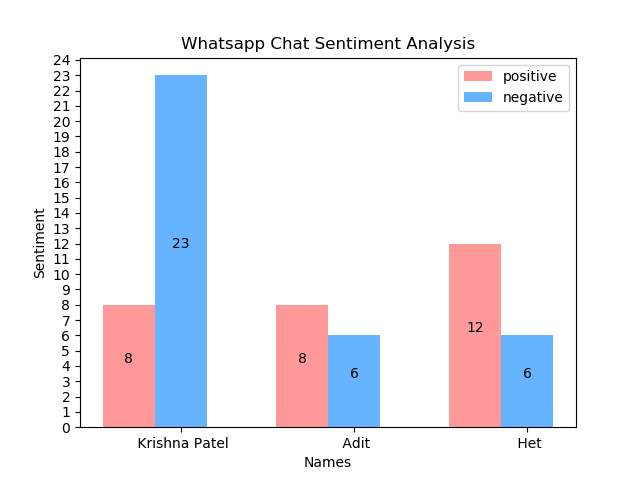

In [8]:
ind = np.arange(len(names))
width=0.3
max_x=max(max(positive),max(negative))+2

fig = plt.figure()
ax = fig.add_subplot()

yvals = positive
rects1 = ax.bar(ind, yvals, width, color='#ff9999')
zvals = negative
rects2 = ax.bar(ind+width, zvals, width, color='#66b3ff')

ax.set_xlabel('Names')
ax.set_ylabel('Sentiment')

ax.set_xticks(ind+width)
ax.set_yticks(np.arange(0,max_x,1))
ax.set_xticklabels( names )
ax.legend( (rects1[0], rects2[0]), ('positive', 'negative') )
ax.set_title('Whatsapp Chat Sentiment Analysis')


autolabel(rects1)
autolabel(rects2)

plt.show()